#Week6 

This weeek's tutorial provides an introduction into **kernel methods**.


In [2]:
## to view 3D scatterplots in a new window (and be able to rotate the plot),
## restart this notebook, comment the next line, uncomment the following one and then run this cell
%pylab inline
#from pylab import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
import matplotlib.pyplot as pl
import numpy as np


##What you should know before solving the challenges:
 - Kernel:
         Definition
         Valid kernel
         Kernel examples
 - Radial basis functions
 - Kernel trick
         Kernel regression
         Kernel nearest neighbours    
 - SVM
 

#Challenges

###1. Kernel

- Advanced: Given a set of paired inputs $(x_1,y_1), ... ,(x_n,y_n)$ and the learning problem:
\begin{equation}
f^* = arg min_{f \in F} J(f)
\end{equation} where 
\begin{equation}
J(f) = L_y(f(x_1),...,f(x_n)) + \Omega (||f||^{2}_{F})
\end{equation}
(the loss $L$ depends on $x_i$ only via $f(x_i)$, $\Omega$ is non-decreasing, and $y$ is the vector of $y_i$) prove that a solution takes the form:
\begin{equation}
f^* = \sum^{n}_{i=1} \alpha_i k(x_i,\cdot)
\end{equation}

$f(x_{i})$ is an inner product of type $<w,x_{i}>$

w can be decomposed in its projection on the space generated by $<x_{i}>$ and an orthogonal vector: $w=w_{p}+w_{o}$

$<w,x_{i}> = <w_{p},x_{i}>$

$\Omega (||w||^{2}) >= \Omega (||w_{p}||^{2})$

So, $J(f) >= J(f^{*})$ and $f^* = \sum^{n}_{i=1} \alpha_i k(x_i,\cdot)$

In [ ]:
print 'Hint: representer theorem'

- Prove that the Gaussian kernel is a valid kernel. Gaussian Kernel: $k(x,x^{\prime}) := exp(-\gamma^{-2} ||x-x^{\prime}||^2)$

$k(x,x^{\prime}) = exp(||x||^2 * -\gamma^{-2}) * exp(||x^{\prime}||^2 * -\gamma^{-2}) * exp(-2||xy|| * -\gamma^{-2})$

map function x -> $exp(||x||^2 * -\gamma^{-2}), xy$ is kernel

$const * ker$ is kernel

$exp(ker)$ is kernel


In [ ]:
print 'Hint: you need to use product rule, mapping rule and exponential kernel'

- Sometimes data is not separable in its given form. Take a look at the 2D example below. There is no line that separates the two classes.
 - Find a feature map $\phi(x): \mathbb{R}^2 \to \mathbb{R}^3, (x = [x_1 \space x_2]^{\top})$ that forms a kernel which separates the two classes as shown in the 3D figure. 
 - By looking at the data and the class label can you guess what common function is represented by the data ? *Hint*: think about logic gates.

- f(x,y) = (x,y,x*y)
- XOR

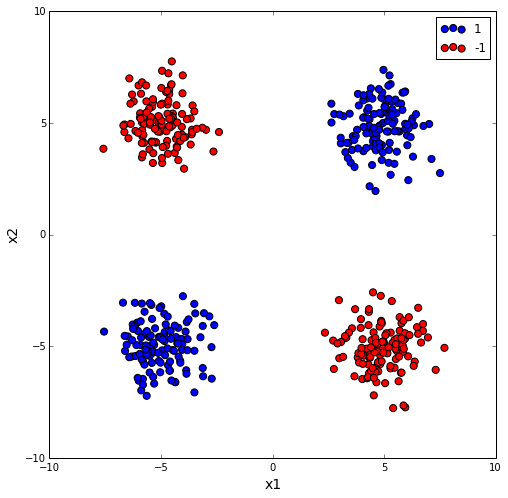

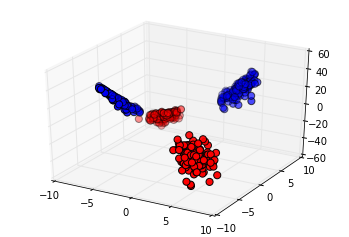

In [4]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
centers = [[-5, -5], [5, -5], [5, 5],[-5, 5]]
X, y = make_blobs(n_samples=500, centers=centers, n_features=2,
                   random_state=0,cluster_std = 1.0)
y = y%2
f = plt.figure(figsize=(14,8))
ax = f.add_subplot(111,aspect='equal')
for i,c,label in zip(np.arange(2),['b','r'],['1','-1']):
    plt.scatter(X[y==i][:,0],X[y==i][:,1],s=50,color=c,edgecolor='k',label=label)
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i,c,label in zip(np.arange(2),['b','r'],['1','-1']):
    ax.scatter(X[y==i][:,0],X[y==i][:,1],X[y==i][:,0]*X[y==i][:,1],s=50,color=c,edgecolor='k',label=label)


###2.  Radial Basis Functions 

- The XOR problem revisited. It was seen before that linear functions cannot separate the XOR data. To this end we will try a different approach. Using a feature map of RBFs (remmember RBFs are just Gaussians $\phi_j(\mathbf{x})$ centered at random training data points):

    $\phi_j(\textbf{x}) = exp \bigg{(} - \frac{M}{d_{max}^2} || \mathbf{x} - \mathbf{\mu}_j ||^2 \bigg{)}$, where $ \{\mathbf{\mu}_j\} \subset \{\mathbf{x}^2\}$ $(\ast)$
  - To perform the XOR classification one must first choose how many basis functions are needed (M = ?). **Find that on your own before proceeding with the task at hand :)** Hint: you have 4 training patterns and 2 classes.
  - **You must now choose the basis functions centres**. For each of the $M$ radial basis functions chosen, pick $\mu_i = [x_{i1}, x_{i2}]$ ,$\mathbf{x} = [x_1,x_2]$, $i = \overline{1,M} $centre points. 
  - (Coding task) With the RBF computed (using $(\ast)$ - Don't forget about $d_{max}$ - distance between $\mu_i$) use $X$ and $y$ defined in the previous exercise to train a linear classifier of the form:
  
      $y(\mathbf{x}) = \displaystyle\sum^{M}_{i=1}w_i\phi_i(\mathbf{x}) + b$
  - Pick 4 points from the dataset in the previous exercise that show the XOR function and experiment with different values for $M$ (= 1,2,3 ?) and for $\mu_i$. What conclusions can you draw?
  - (Bonus - Coding task) Plot the representation of the points in XOR problem (at leaast 4 points) in both $(x_1,x_2)$ coordinate system as well as in a coordinate system comprised of $(\phi_1,\phi_2)$ for M=2. Are the points linearly separable in the second coordinate system? Why?


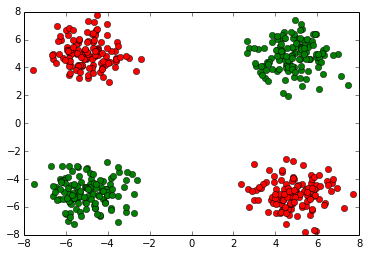

In [51]:
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

def rbf(x,u):
    sigma = 2
    return exp(-(numpy.linalg.norm(x-u)**2)/(2.0*(sigma**2)))

def make_design_matrix(centroids, X):
    ret = np.empty((0,len(centroids)))
    for point in X:
        line = []
        for centroid in centroids:
            line.append(rbf(point,centroid))
        ret = vstack((ret,line))
    return ret

centroids = [np.array([-5,-5]),np.array([-5,5]),np.array([5,-5]),np.array([5,5]) ]

pi = make_design_matrix(centroids, X)
model = LinearRegression()
model.fit(pi,y)
for i in range(len(X)):
    pred = model.predict(pi[i])
    if pred>0.5:
        plt.plot(X[i][0],X[i][1],"ro")
    else:
        plt.plot(X[i][0],X[i][1],"go")

###3. Kernel trick

- The kernel trick works for many algorithms: SVM, SVM-regression, Kernel-PCA, Kernel-clustering, Perceptron. However the kernel trick is not usually used for Perceptron. Why is that? Explain.

In [ ]:
print 'Explanation:'

###4. SVM

- Train a SVM on the iris dataset. The following script produces a plot below, in which the colors illustrate the highest probability among the three classes (i.e., the confidence of the prediction).
  - Answer the following questions:
   - Is the setosa grouping is clearly distinct from the other two?
   - Why is there a small confidence in detecting the other two types of sepals?
   - Are the boundaries satisfactory (i.e. the blue colored lines)?
   - Why is there such a high confidence for spaces which have no training points to them (for example the top left corner)? How should an implementation that uses RBF look like?

- yep
- there is no clear separation area between green and blue, so it's hard to pick good support vectors
- it depends on what problem you want to solve

<matplotlib.colorbar.Colorbar instance at 0x7ff57790e950>

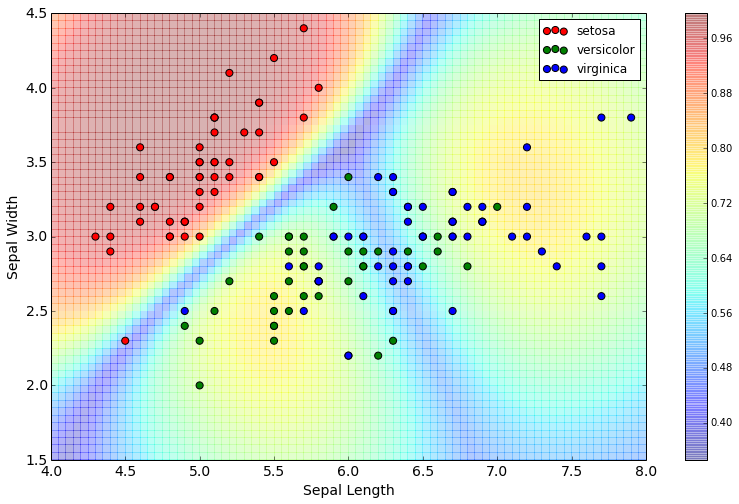

In [54]:
import matplotlib.pyplot as plt
from sklearn import datasets,svm
import numpy as np
 
# Import the Iris dataset and keep the first two features
iris = datasets.load_iris()
x_train = iris.data[:,:2]
y_train = iris.target
 
# Instantiate the model and fit to data
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(x_train,y_train)

 
# Predict (maximum) probabilities for plot
x = np.arange(4,9,0.05)
y = np.arange(1,6,0.05)
xx,yy = np.meshgrid(x,y)
zz = clf.predict_proba(np.vstack((xx.ravel(),yy.ravel())).T).max(axis=1).reshape(xx.shape)

# Create plot
f = plt.figure(figsize=(14,8))
ax = f.add_subplot(111,aspect='equal')
for i,c,label in zip(np.arange(3),['r','g','b'],iris.target_names):
    plt.scatter(x_train[y_train==i][:,0],x_train[y_train==i][:,1],s=50,color=c,edgecolor='k',label=label)
pcol = plt.pcolormesh(xx,yy,zz,alpha=0.3,zorder=0)
 
plt.xlim(4,8)
plt.ylim(1.5,4.5)
plt.xlabel('Sepal Length',fontsize=14)
plt.ylabel('Sepal Width',fontsize=14)
plt.tick_params(axis='both',which='major',labelsize=14)
plt.legend()
plt.colorbar()
#plt.savefig('pyplot.png')

###5. AAAAAAAAND DONE!

In [ ]:
print "Done"